In [570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [571]:
df = pd.read_csv('/workspaces/ml-zoomcamp-hw/03-Classification/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)


In [572]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [573]:
df.churn = (df.churn == 'yes').astype(int)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [574]:
del df_train['churn']
del df_val['churn']
del df_test['churn']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]
dv = DictVectorizer(sparse=False)



In [575]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
LogisticRegression()
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [576]:
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

Module 4 Code 

In [577]:
len(y_val)

1409

In [578]:
(y_val == churn_decision).sum()

np.int64(1132)

In [579]:
from sklearn.metrics import accuracy_score

In [580]:
scores = []

thresholds = np.linspace(0, 1, 21)

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.734
0.30 0.758
0.35 0.765
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


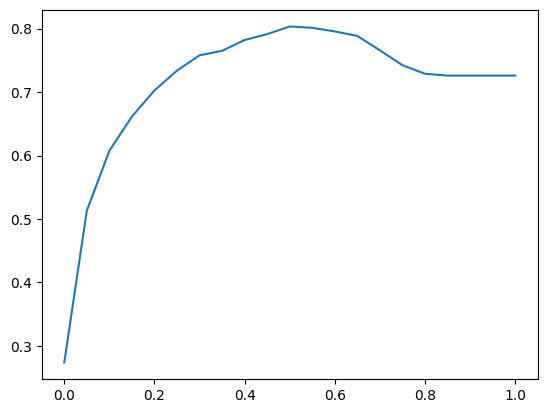

In [581]:
plt.plot(thresholds, scores)

In [582]:
from collections import Counter

In [583]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [584]:
y_val.mean()
#27% of tthe data has people churning

np.float64(0.2739531582682754)

In [585]:
1 - y_val.mean()
#73% of the data is people non churning
#This created class imbalance, more costumers non churning than churning 3:1
#Accuracy not a great score for class imbalance

np.float64(0.7260468417317246)

Confusion Table

In [586]:
actual_postive = (y_val == 1)
actual_negative = (y_val ==0)

In [587]:
actual_negative, actual_postive


(array([ True,  True,  True, ...,  True, False, False], shape=(1409,)),
 array([False, False, False, ..., False,  True,  True], shape=(1409,)))

In [588]:
t = 0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred < t)

In [589]:
predict_positive[:10],actual_postive[:10]

(array([False, False, False,  True, False, False, False, False,  True,
        False]),
 array([False, False, False,  True, False, False, False, False,  True,
         True]))

In [590]:
tp = (predict_positive & actual_postive).sum()
fp = (predict_positive & actual_negative).sum()

tn = (predict_negative & actual_negative).sum()
fn = (predict_negative & actual_postive).sum()

In [591]:
tp, tn, fp, fn

(np.int64(212), np.int64(920), np.int64(103), np.int64(174))

In [592]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [593]:
confusion_matrix

array([[920, 103],
       [174, 212]])

In [594]:
(confusion_matrix/confusion_matrix.sum()).round(3)

array([[0.653, 0.073],
       [0.123, 0.15 ]])

Precision and Recall

In [595]:
#Accuracy
(tp + tn)/(tp + tn + fp +fn)


np.float64(0.8034066713981547)

In [596]:
#Precision 
#Tells us the fraction of positive predictions that are correct 
#True positives divided by true positi
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# ves + false positives
#Looking at true and  false predicted postiives
#TP/TP + FP
p = (tp/(tp+fp))
p

np.float64(0.6730158730158731)

In [597]:
tp + fp

np.int64(315)

In [598]:
#Recall
#Fraction that calculates the proportion of actual positives that were correctly identified
#Number of predicted true positives/total positive observations (true + false negatives)
#In this case looking at all the customers that are churning, all true positives.
#TP/( TP + FN)
r = (tp/(tp+fn))
r
#We only correctly identified 54% of the total of customers churning

np.float64(0.5492227979274611)

In [599]:
#False positive rate
FPR = fp/(tn + fp)

#True postive rate
TPR = tp/(tp + fn)
TPR

np.float64(0.5492227979274611)

In [600]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_postive = (y_val == 1)
    actual_negative = (y_val == 0)
    

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_postive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_postive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [601]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,533,20,490
20,0.2,339,372,47,651
30,0.3,292,247,94,776
40,0.4,254,175,132,848
50,0.5,212,103,174,920
60,0.6,151,53,235,970
70,0.7,69,13,317,1010
80,0.8,4,0,382,1023
90,0.9,0,0,386,1023


In [602]:
df_scores['tpr']= df_scores.tp/(df_scores.tp + df_scores.fn) 
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn) 

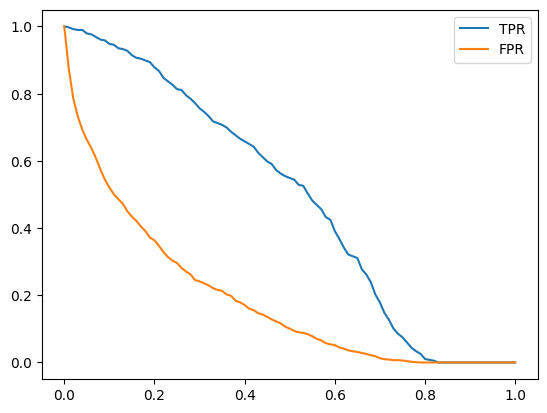

In [603]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()
#We want FPR to decrease as fast possible

Random Model

In [604]:
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.401, 0.034, 0.658, ..., 0.754, 0.408, 0.898], shape=(1409,))

In [605]:
((y_rand >= 0.5)== y_val).mean()

np.float64(0.5046132008516678)

In [606]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_postive = (y_val == 1)
        actual_negative = (y_val == 0)
        

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_postive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_postive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr']= df_scores.tp/(df_scores.tp + df_scores.fn) 
    df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn) 
    
    return df_scores

In [607]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [608]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,346,924,40,99,0.896373,0.903226
20,0.2,308,829,78,194,0.797927,0.810362
30,0.3,274,720,112,303,0.709845,0.703812
40,0.4,238,599,148,424,0.616580,0.585533
50,0.5,194,506,192,517,0.502591,0.494624
60,0.6,156,411,230,612,0.404145,0.401760
70,0.7,123,305,263,718,0.318653,0.298143
80,0.8,87,201,299,822,0.225389,0.196481
90,0.9,45,94,341,929,0.116580,0.091887


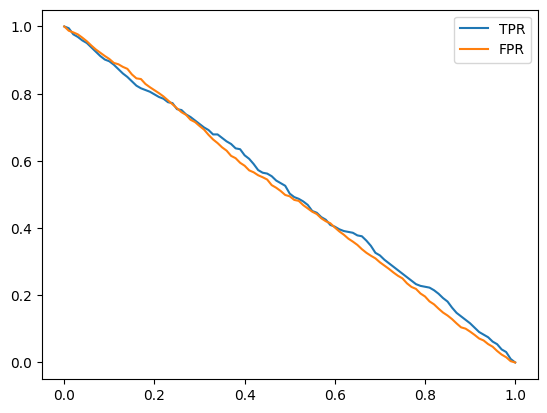

In [609]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

Ideal Model

In [610]:
num_neg = (y_val == 0).sum()
num_pos= (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [611]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [612]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [613]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

((y_ideal_pred >= 0.726) == y_ideal).mean()


np.float64(1.0)

In [614]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

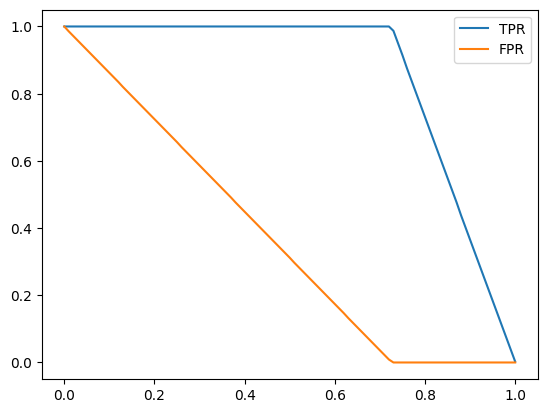

In [615]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

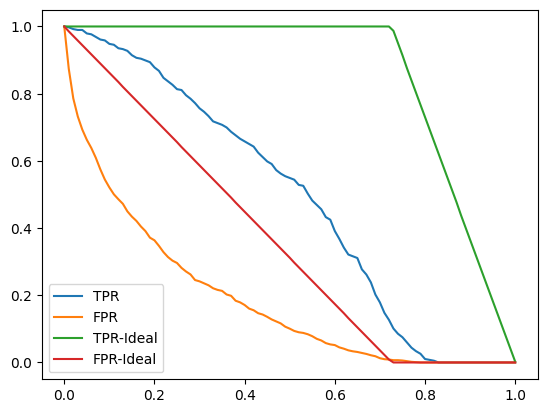

In [616]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')

#plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR-Random')
#plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR-Random')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR-Ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR-Ideal')

plt.legend()

/tmp/ipykernel_26502/161258520.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


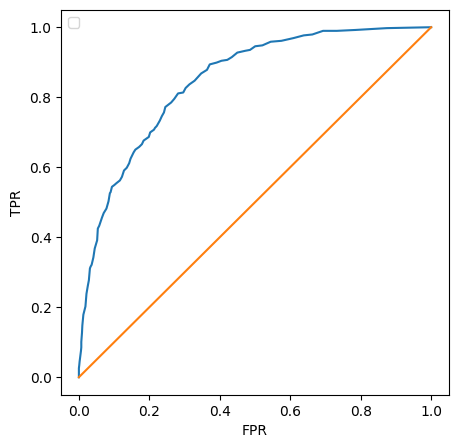

In [617]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1],[0,1])
#plt.plot(df_rand.fpr, df_rand.tpr)
#plt.plot(df_ideal.fpr, df_ideal.tpr)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

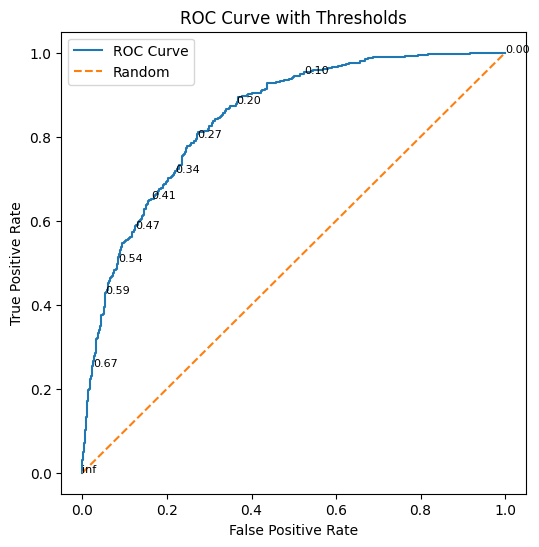

In [618]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0,1],[0,1], label='Random', linestyle='--')



for i in range(0, len(thresholds), max(1, len(thresholds)//10)):  # show about 10 labels
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.show()

In [619]:
#want to be a close to 1.0 or 100% for TPR and 0% for FPR
#Finding the area under the cuver can help us quantify the ROC curve.

from sklearn.metrics import auc

In [620]:
auc(fpr, tpr)

0.8463120254863528

In [621]:
auc(df_scores.fpr, df_scores.tpr)

0.8459194991870908

In [622]:
auc(df_ideal.fpr, df_ideal.tpr)


0.9999430203759136

In [623]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8463120254863528

In [624]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8463120254863528

ROC AUC measures the probability that the model assigns a higher predicted score to a randomly chosen positive instance than to a randomly chosen negative instance.

In [625]:
negative = y_pred[y_val == 0]
positive = y_pred[y_val == 1]

In [626]:
import random
n = 1000
success = 0 

for i in range(n):
    pos_index = random.randint(0, len(positive)-1)

    negative_index = random.randint(0, len(negative)-1)
    
    if positive[pos_index] > negative[negative_index]:
        success = success + 1
    
success / n


0.85

In [627]:
n= 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(positive), size=n)
neg_ind = np.random.randint(0, len(negative), size=n)

(positive[pos_ind] > negative[neg_ind]).mean()

np.float64(0.84914)

In [628]:
negative[neg_ind]
positive[pos_ind]

array([0.20110648, 0.0184917 , 0.42800125, ..., 0.02393389, 0.46602188,
       0.41733944], shape=(50000,))

Cross Validation
Evaluating the same model on different subsets of the validation data


In [629]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [630]:
dv, model = train(df_train, y_train)

In [631]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [632]:
predict(df_val, dv, model )

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.15149644, 0.78847856,
       0.81190391], shape=(1409,))

In [633]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
#90% of data for training, 10% for validation since we split data by 10


In [634]:
train_idx, val_idx = next(kfold.split(df_full_train))


In [635]:
len(train_idx), len(val_idx)

(5070, 564)

In [636]:
len(df_full_train)

5634

In [637]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [638]:

scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [639]:
scores

[0.8496891051635577,
 0.8423576732673268,
 0.8582960982010862,
 0.8332236029956382,
 0.8248604218362282,
 0.8410922410922411,
 0.8431129925105829,
 0.8252609108159393,
 0.8458425967096488,
 0.8609794628751974]